<a href="https://colab.research.google.com/github/ViniciusKarnopp/CursoPythonDio/blob/main/Pandas_AnaliseEmendasParlamentares.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

<ipython-input-64-108091f10927>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
#upload do arquivo
#from google.colab import files
#arq = files.upload()
#aqui você faz o upload da planilha
#é arquivo temporario. Ele não salva no seu drive. Se fechar o colab, precisa fazer upload dnv

In [ ]:
df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dados/Emendas.xlsx")

In [ ]:
df.head()

,Código da Emenda,Ano da Emenda,Tipo de Emenda,Código do Autor da Emenda,Nome do Autor da Emenda,Número da emenda,Localidade do gasto,Código Função,Nome Função,Código Subfunção,Nome Subfunção,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos A Pagar Inscritos,Valor Restos A Pagar Cancelados,Valor Restos A Pagar Pagos
0,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,SÃO JOÃO DO CARÚ - MA,10,Saúde,301,Atenção básica,1253150.00,0.0,0.0,0.0,0.00,1253150.00
1,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,BORBA - AM,10,Saúde,122,Administração geral,999958.00,0.0,0.0,0.0,0.00,999958.00
2,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,Nacional,13,Cultura,392,Difusão cultural,1665560.68,150860.0,0.0,0.0,243083.14,1422477.54
3,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,MARANHÃO (UF),18,Gestão ambiental,544,Recursos hídricos,500000.00,0.0,0.0,0.0,500000.00,0.00
4,Sem informação,2014,Emenda Individual,S/I,Sem informação,S/I,PERNAMBUCO (UF),10,Saúde,302,Assistência hospitalar e ambulatorial,23826320.09,0.0,0.0,0.0,6463502.51,17362817.58


In [ ]:
df.dtypes

Código da Emenda                    object
Ano da Emenda                        int64
Tipo de Emenda                      object
Código do Autor da Emenda           object
Nome do Autor da Emenda             object
Número da emenda                    object
Localidade do gasto                 object
Código Função                       object
Nome Função                         object
Código Subfunção                    object
Nome Subfunção                      object
Valor Empenhado                    float64
Valor Liquidado                    float64
Valor Pago                         float64
Valor Restos A Pagar Inscritos     float64
Valor Restos A Pagar Cancelados    float64
Valor Restos A Pagar Pagos         float64
dtype: object

In [ ]:
df.shape

(59138, 17)

In [ ]:
#vamos considerar somente o valor pago
df["Valor Pago"].sum()

94522532501.87

In [ ]:
df["Ano da Emenda"].unique()

array([2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])

In [ ]:
#excluindo linhas com valor pago igual a 0
df_valor_pago_nao_nulo = df[(df["Valor Pago"] < 1)].index
df.drop(df_valor_pago_nao_nulo, inplace=True)

In [ ]:
df["Troco"] = df["Valor Empenhado"] - df["Valor Pago"]

In [ ]:
df.tail()

,Código da Emenda,Ano da Emenda,Tipo de Emenda,Código do Autor da Emenda,Nome do Autor da Emenda,Número da emenda,Localidade do gasto,Código Função,Nome Função,Código Subfunção,Nome Subfunção,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos A Pagar Inscritos,Valor Restos A Pagar Cancelados,Valor Restos A Pagar Pagos,Troco
59128,202341820002,2023,Emenda Individual,4182,ZEQUINHA MARINHO,2,PARÁ (UF),10,Saúde,302,Assistência hospitalar e ambulatorial,552088.0,552088.0,552088.0,0.0,0.0,0.0,0.0
59130,202341820004,2023,Emenda Individual,4182,ZEQUINHA MARINHO,4,PARÁ (UF),10,Saúde,302,Assistência hospitalar e ambulatorial,595000.0,320000.0,320000.0,0.0,0.0,0.0,275000.0
59131,202341820007,2023,Emenda Individual,4182,ZEQUINHA MARINHO,7,MÚLTIPLO,MU,Múltiplo,MU,Múltiplo,1390089.0,1300000.0,1300000.0,0.0,0.0,0.0,90089.0
59132,202341820008,2023,Emenda Individual,4182,ZEQUINHA MARINHO,8,PARÁ (UF),28,Encargos especiais,845,Outras transferências,1497821.0,389410.5,389410.5,0.0,0.0,0.0,1108410.5
59133,202341820009,2023,Emenda Individual,4182,ZEQUINHA MARINHO,9,MÚLTIPLO,MU,Múltiplo,MU,Múltiplo,1472314.0,500000.0,500000.0,0.0,0.0,0.0,972314.0


In [ ]:
df["Código da Emenda"].unique()

array(['Sem informação', 201520180003, 201520980009, ..., 202341820007,
       202341820008, 202341820009], dtype=object)

In [ ]:
df["Nome do Autor da Emenda"].unique()

array(['Sem informação', 'AELTON FREITAS', 'AFONSO HAMM', ...,
       'NEY LEPREVOST', 'PATRICIA FERRAZ', 'PAULINHO DA FORCA'],
      dtype=object)

In [ ]:
#formatando o jeito que mostra os valores
pd.options.display.float_format = '{:50,.2f}'.format

In [ ]:
#agrupando valor gasto por ano
df.groupby("Ano da Emenda")["Valor Pago"].sum().sort_values(ascending=True)

Ano da Emenda
2015                                        24,276,108.08
2014                                       133,325,135.13
2017                                     5,347,191,921.12
2018                                     5,474,124,508.61
2019                                     6,036,585,201.79
2023                                    10,749,315,561.18
2021                                    15,898,814,552.81
2016                                    16,221,561,925.11
2022                                    17,005,632,631.24
2020                                    17,631,726,948.51
Name: Valor Pago, dtype: float64

Text(0, 0.5, 'Valores em bilhoes')

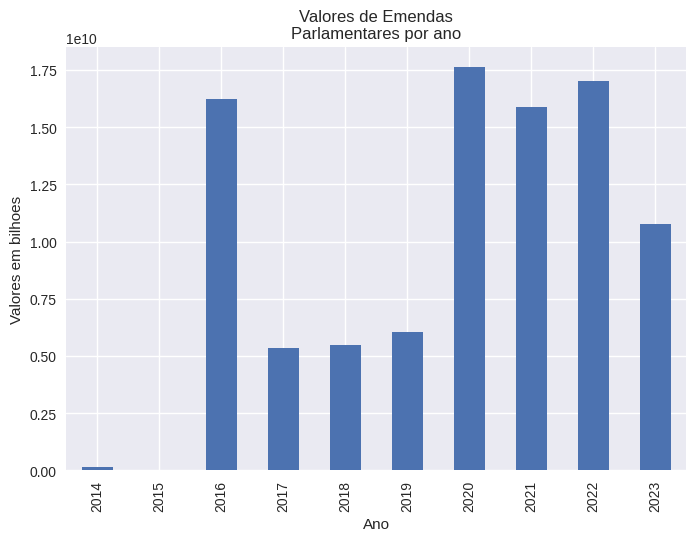

In [ ]:
df.groupby("Ano da Emenda")["Valor Pago"].sum().plot.bar(title="Valores de Emendas\nParlamentares por ano")
plt.xlabel("Ano")
plt.ylabel("Valores em bilhoes")

In [79]:
df_2023 = df[df["Ano da Emenda"] == 2023]
df_2023.head()

,Código da Emenda,Ano da Emenda,Tipo de Emenda,Código do Autor da Emenda,Nome do Autor da Emenda,Número da emenda,Localidade do gasto,Código Função,Nome Função,Código Subfunção,Nome Subfunção,Valor Empenhado,Valor Liquidado,Valor Pago,Valor Restos A Pagar Inscritos,Valor Restos A Pagar Cancelados,Valor Restos A Pagar Pagos,Troco
54373,202338950001,2023,Emenda Individual,3895,ABILIO SANTANA,1,CORAÇÃO DE MARIA - BA,10,Saúde,301,Atenção básica,"1,500,000.00","1,500,000.00","1,500,000.00",0.00,0.00,0.00,0.00
54374,202338950002,2023,Emenda Individual,3895,ABILIO SANTANA,2,CORIBE - BA,10,Saúde,301,Atenção básica,"2,000,000.00","2,000,000.00","2,000,000.00",0.00,0.00,0.00,0.00
54377,202338950005,2023,Emenda Individual,3895,ABILIO SANTANA,5,SANTA TERESINHA - BA,10,Saúde,301,Atenção básica,"1,500,000.00","1,500,000.00","1,500,000.00",0.00,0.00,0.00,0.00
54378,202338950006,2023,Emenda Individual,3895,ABILIO SANTANA,6,SÁTIRO DIAS - BA,10,Saúde,301,Atenção básica,"1,048,137.00","1,048,137.00","1,048,137.00",0.00,0.00,0.00,0.00
54379,202338950008,2023,Emenda Individual,3895,ABILIO SANTANA,8,UBAÍRA - BA,10,Saúde,301,Atenção básica,"1,500,000.00","1,500,000.00","1,500,000.00",0.00,0.00,0.00,0.00
